# EDA: Synthetic Fraud Dection Data

**Hypothesis**: Fraud attacks will likely happen within a relatively short window, with many micro transactions and possibly targeting a certain demographic. Look for anomalies in spending patterns across different groups (male/female or age groups etc).

*Questions*:
*   Do fraudulent transactions cluster at specific, unusual times of the day?
*   Is there a disproportionate number of fraud victims within a specific gender or age group?
*   Do fraudulent transactions overwhelmingly occur in specific spending categories?
*   Are fraudulent transactions, on average, smaller than legitimate ones, suggesting fraudsters are testing the waters?

In [1]:
import pandas as pd
import os
from pathlib import Path


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
notebook_dir = Path.cwd()
project_root = notebook_dir.parent

training_data = project_root/'data'/'raw'/'fraudTrain.csv'
test_data = project_root/'data'/'raw'/'fraudTest.csv'


credit_card_fraud_data = pd.read_csv(training_data, index_col=0)
df=credit_card_fraud_data.copy()
print('Dataframe succesfully created')
print(f'Dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

Dataframe succesfully created
Dataframe has 1296675 rows and 22 columns.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [4]:
df.isna().mean()

trans_date_trans_time   0.00
cc_num                  0.00
merchant                0.00
category                0.00
amt                     0.00
first                   0.00
last                    0.00
gender                  0.00
street                  0.00
city                    0.00
state                   0.00
zip                     0.00
lat                     0.00
long                    0.00
city_pop                0.00
job                     0.00
dob                     0.00
trans_num               0.00
unix_time               0.00
merch_lat               0.00
merch_long              0.00
is_fraud                0.00
dtype: float64

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [6]:
print(f'Transctions that are fraud: {df['is_fraud'].value_counts()[1]}')
print(f'\nTransctions that are not fraud: {df['is_fraud'].value_counts()[0]}')
print(f'\nClass imbalanced; {(df['is_fraud'].value_counts()[0]/df.shape[0]):.2f} not fraud')


Transctions that are fraud: 7506

Transctions that are not fraud: 1289169

Class imbalanced; 0.99 not fraud


In [7]:
#libraries
import matplotlib.pyplot as plt
import seaborn as sns

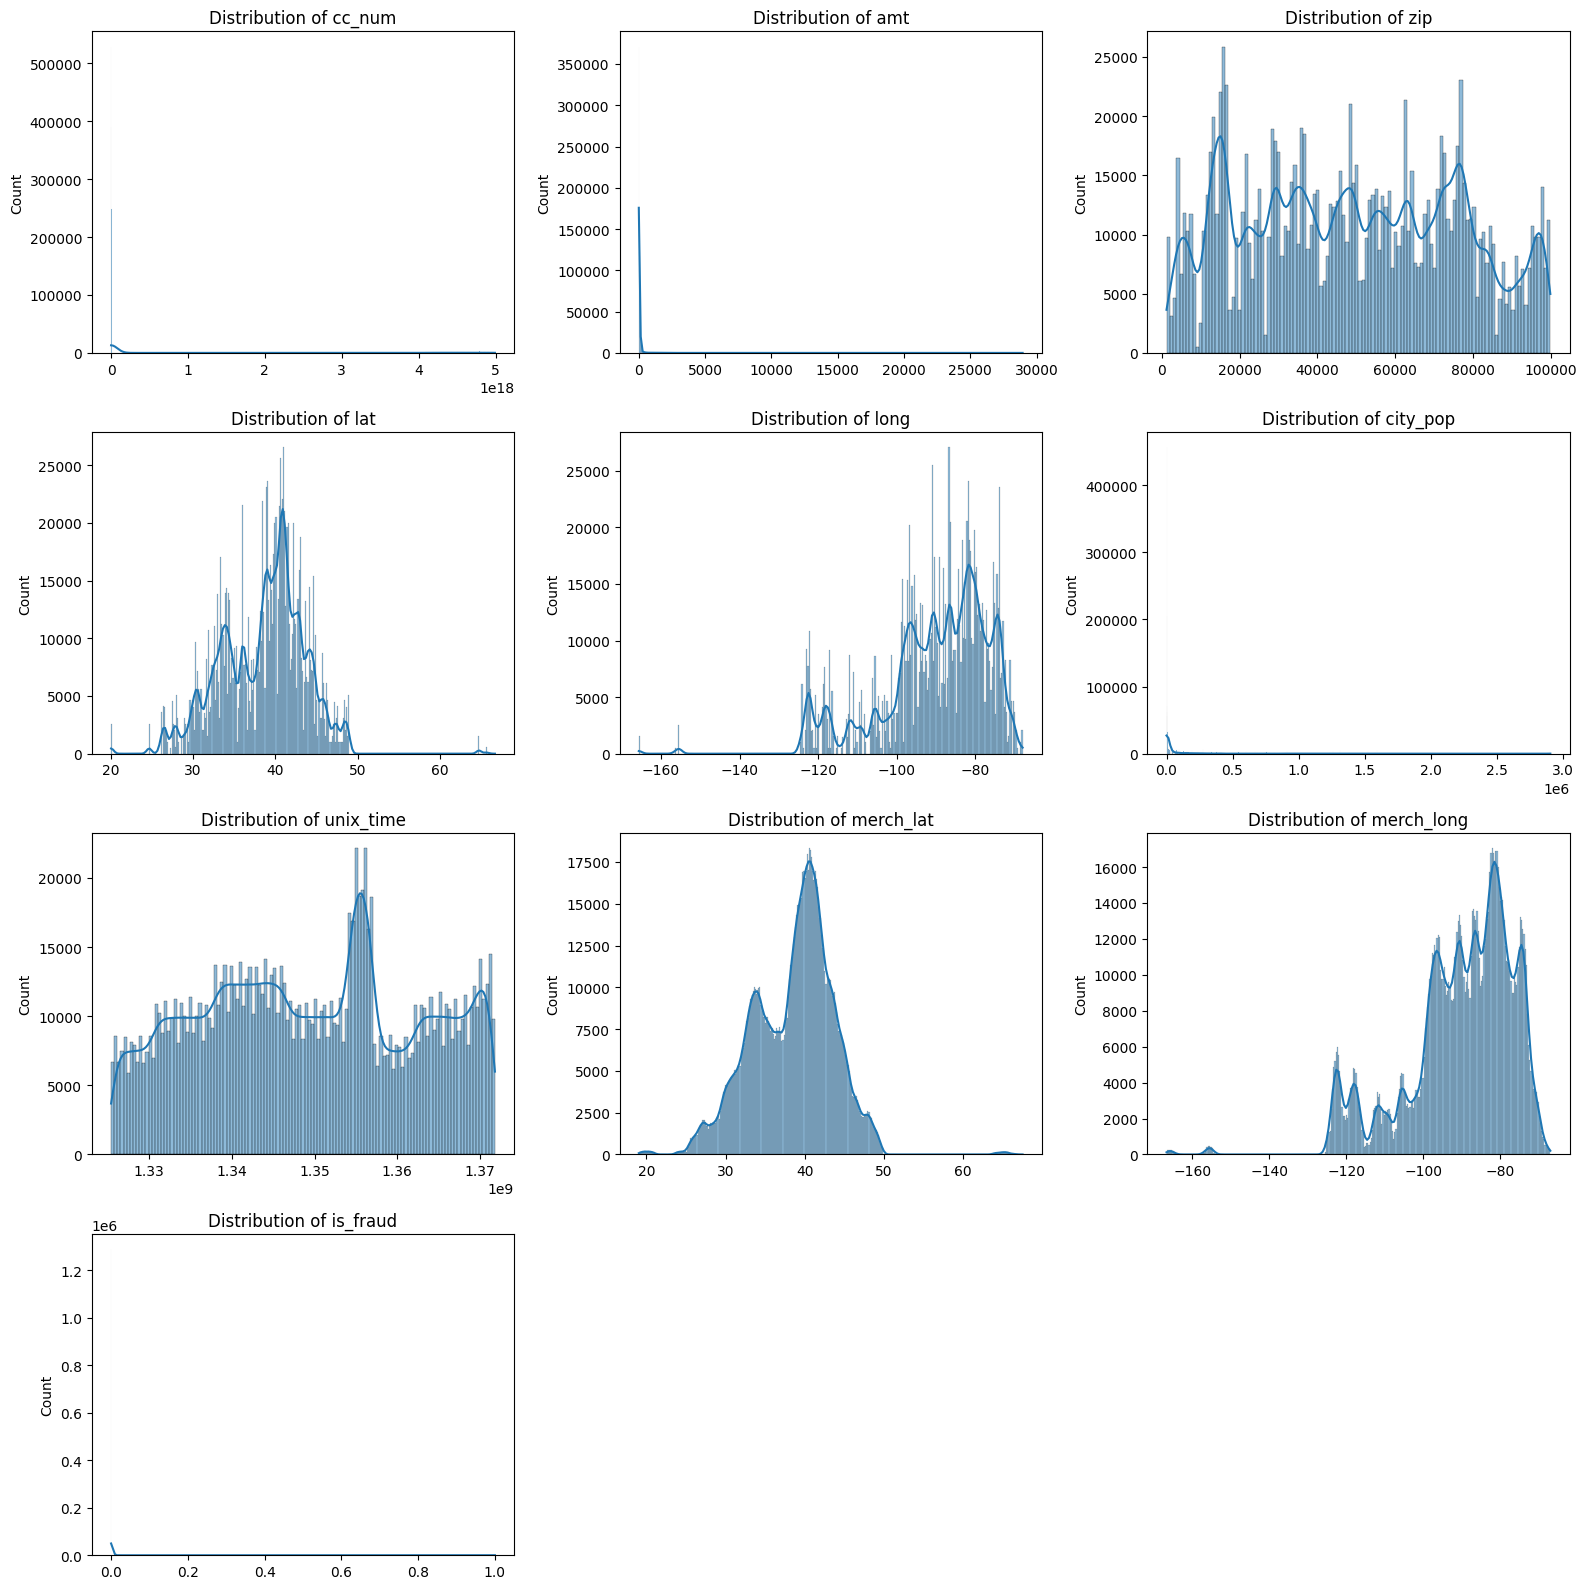

In [8]:
#check data distribution of numeric columns

numerical_cols = df.select_dtypes(include=['int64','float64']).columns
n_cols= 3
n_rows = (len(numerical_cols)-1) // n_cols+1

fig,axes = plt.subplots(n_rows,n_cols, figsize=(16, n_rows*4))

for col, ax in zip(numerical_cols, axes.flatten()):
    sns.histplot(x=df[col], ax=ax, kde=True)

    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')

for i in range(len(numerical_cols), len(axes.flatten())):
    axes.flatten()[i].axis('off')

plt.tight_layout()

plt.show()

In [9]:
non_numeric_cols= df.select_dtypes(include=['object'])

non_numeric_cols.nunique()

trans_date_trans_time    1274791
merchant                     693
category                      14
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
job                          494
dob                          968
trans_num                1296675
dtype: int64

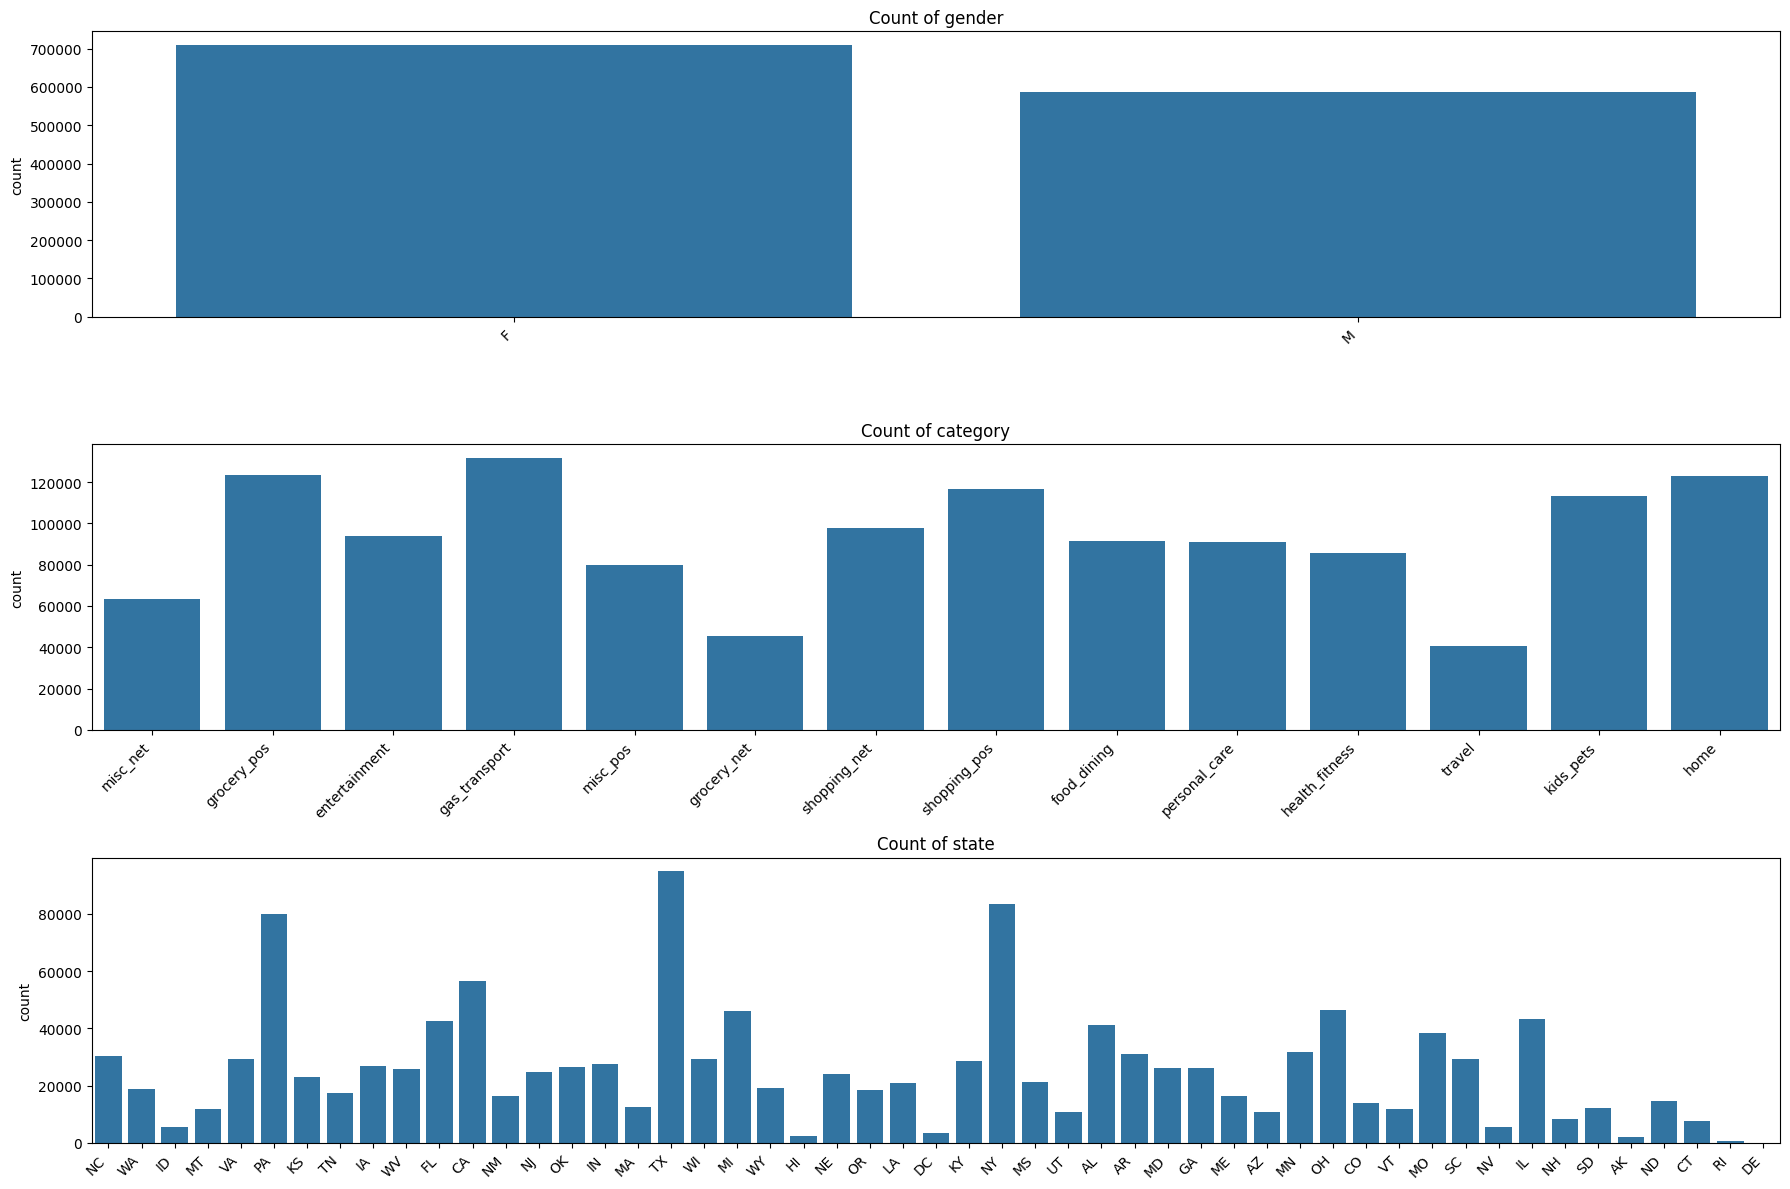

In [10]:
categorical_cols = ['gender', 'category', 'state']
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(n_cols*6, 12))
axes =axes.flatten()
for col, ax in zip(categorical_cols,axes):
    sns.countplot(data=df, x=col,ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel('')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

*   The fetaure "merchant" has the following term 'fraud_' before the merchant name. This will be removed, the term is found on both fraud and not fraud records
*   The feature "trans_date_trans_time" to be changed from number to datetime
*   The feature "dob" data type to be changed from object to datetime

In [11]:
df['merchant'] = df['merchant'].str.removeprefix('fraud_')

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d',errors='coerce')

In [12]:

print(f'Tranaction date and time data type: {df['trans_date_trans_time'].dtype}')
print(f'\nDate of birth data type: {df['dob'].dtype}')
print(f'\nVerify "fraud_" removed:\n{df['merchant'].head()}')

Tranaction date and time data type: datetime64[ns]

Date of birth data type: datetime64[ns]

Verify "fraud_" removed:
0            Rippin, Kub and Mann
1       Heller, Gutmann and Zieme
2                  Lind-Buckridge
3    Kutch, Hermiston and Farrell
4                   Keeling-Crist
Name: merchant, dtype: object


#### Are fraudulent transactions, on average, smaller than legitimate ones, suggesting fraudsters are testing the waters?

In [13]:
print('Exploring transaction amounts for fraud and not fraud cases')
print(f'\nNot Fraud:\n{df[df['is_fraud']==0]['amt'].describe()}')
print(f'\nFraud:\n{df[df['is_fraud']==1]['amt'].describe()}')

Exploring transaction amounts for fraud and not fraud cases

Not Fraud:
count   1289169.00
mean         67.67
std         154.01
min           1.00
25%           9.61
50%          47.28
75%          82.54
max       28948.90
Name: amt, dtype: float64

Fraud:
count   7506.00
mean     531.32
std      390.56
min        1.06
25%      245.66
50%      396.50
75%      900.88
max     1376.04
Name: amt, dtype: float64


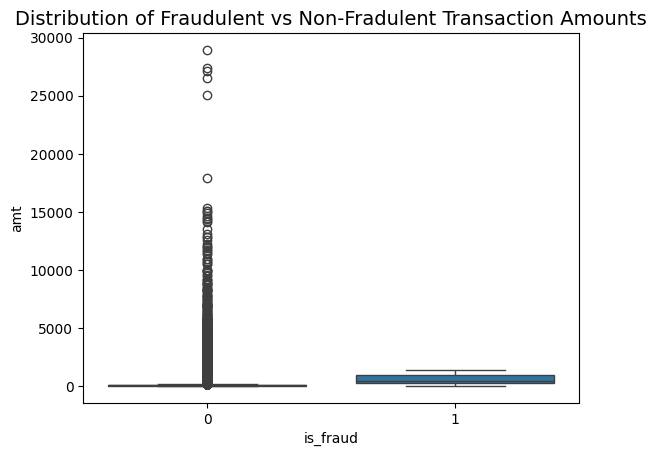

In [14]:
plt.Figure(figsize=(12,6))
sns.boxplot(data=df, x= 'is_fraud',y='amt')
plt.title("Distribution of Fraudulent vs Non-Fradulent Transaction Amounts",
          fontsize=14)
plt.show()

In [15]:
df['hour'] = df['trans_date_trans_time'].dt.hour

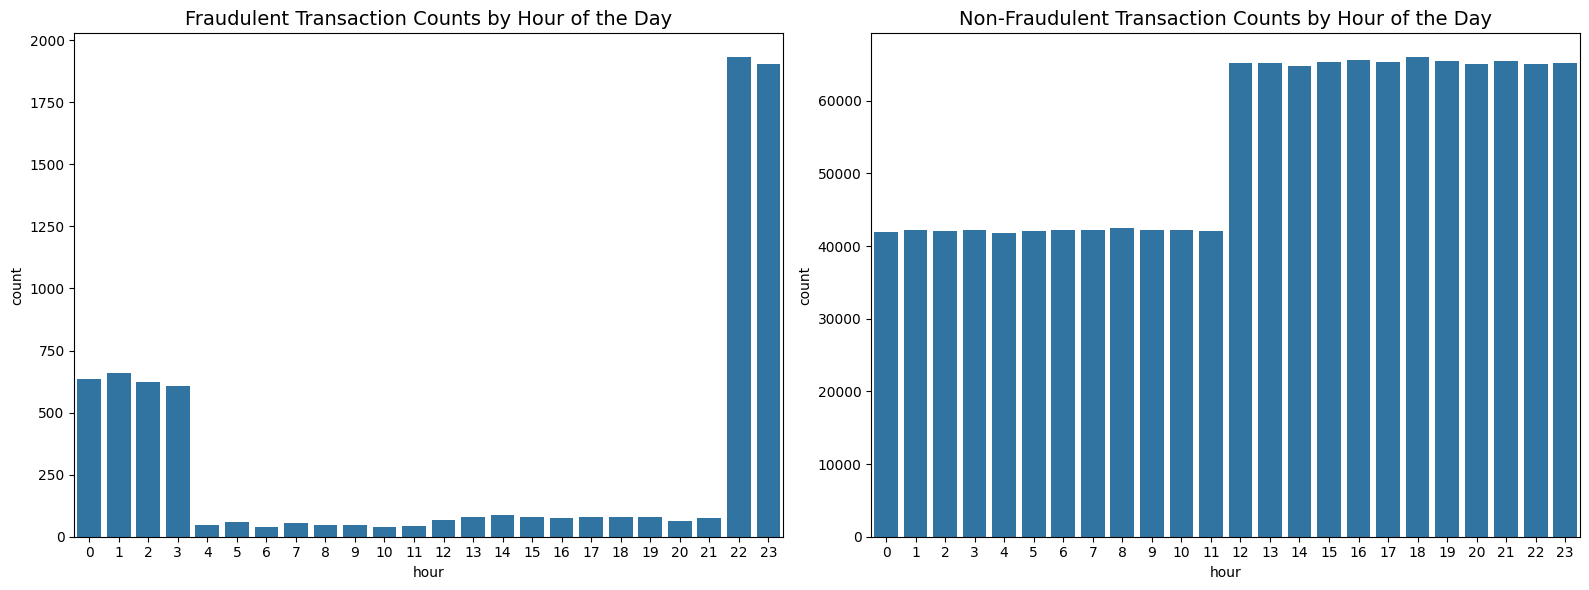

In [16]:
fradulent, not_fraudulent = df[df['is_fraud']==1], df[df['is_fraud']==0]

fraud_data_partition = [fradulent, not_fraudulent]
plot_titles = ['Fraudulent', 'Non-Fraudulent']

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(16,6))
axes =axes.flatten()

for data, ax, title in zip(fraud_data_partition,axes,plot_titles):
    sns.countplot(data=data, x='hour',ax=ax)
    ax.set_title(f'{title} Transaction Counts by Hour of the Day', fontsize=14)
    ax.set_xlabel('hour')

plt.tight_layout()
plt.show()


Findings:
1.  Fraudulent transactions peak during 10PM-12AM (22:00 PM - 00:00 AM) at night
2.  Significant fraudulent activity also occurs during 12:00 AM - 4:00 AM (00:00 AM - 04:00 AM).

In [17]:
df['day_of_week_num'] = df['trans_date_trans_time'].dt.day_of_week
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

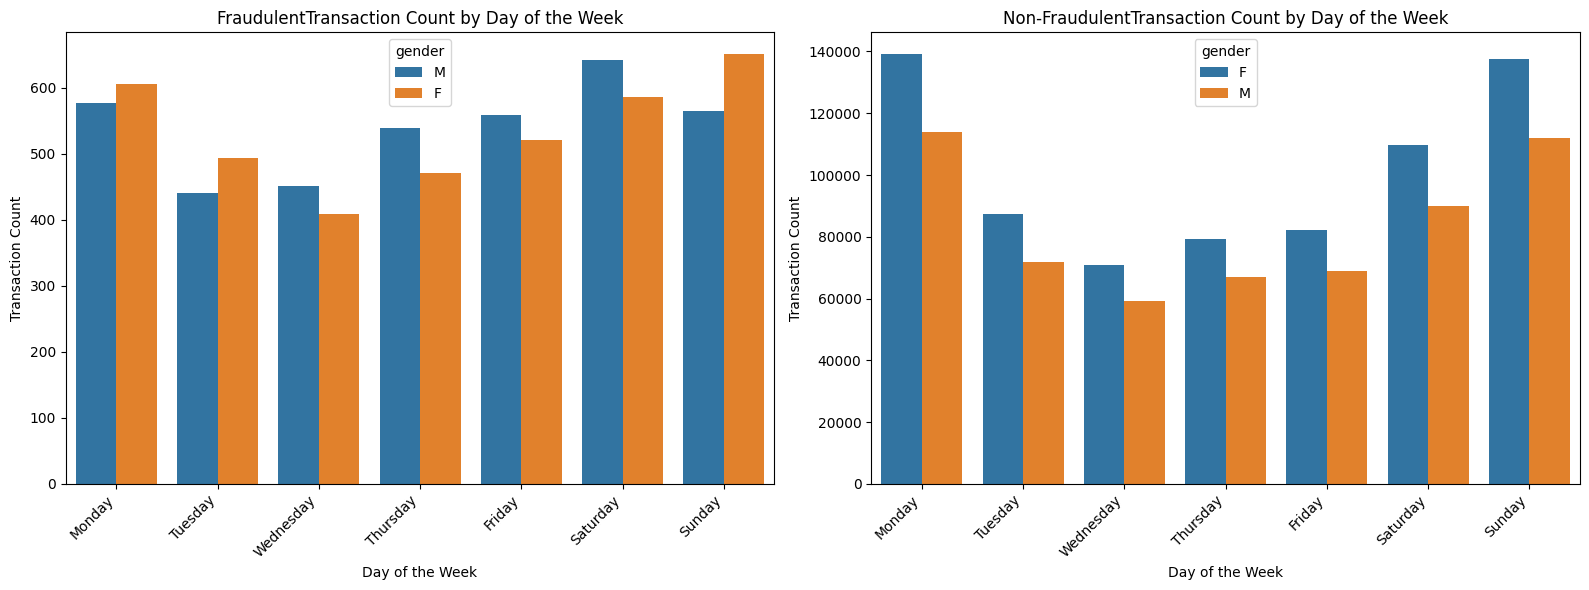

In [18]:
fraudulent, not_fraudulent = df[df['is_fraud']==1], df[df['is_fraud']==0]

fraud_data_partition = [fraudulent, not_fraudulent]
plot_titles = ['Fraudulent', 'Non-Fraudulent']

day_order= [
    'Monday', 'Tuesday', 'Wednesday',
      'Thursday', 'Friday', 'Saturday', 'Sunday'
      ]

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(16,6))
axes =axes.flatten()

for data, ax, title in zip(fraud_data_partition,axes,plot_titles):
  sns.countplot(x='day_of_week', data=data, ax=ax,hue='gender', order=day_order)
  
  ax.set_title(f'{title}Transaction Count by Day of the Week')
  ax.set_xlabel('Day of the Week')
  ax.set_ylabel('Transaction Count')
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right') 

plt.tight_layout()
plt.show()


Findings:
1.  Fradulent transactions peak on Saturday and Sunday; highest period of activity is from Friday to Monday.

#### Is there a disproportionate number of fraud victims within a specific gender or age group?

In [19]:
df['age']= (df['trans_date_trans_time']-df['dob']).dt.days //365

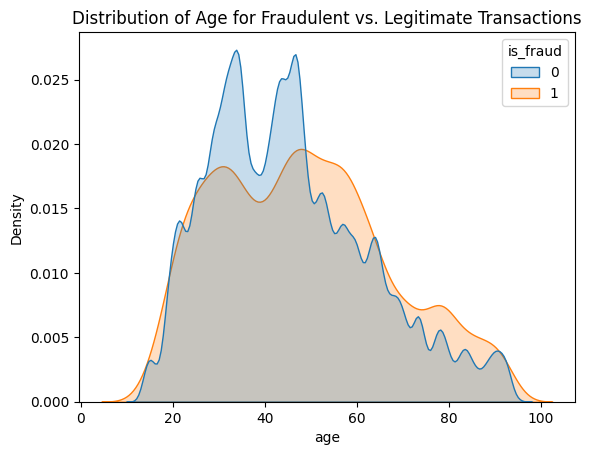

In [20]:
sns.kdeplot(data=df, x='age', hue='is_fraud', fill=True, common_norm=False)
plt.title('Distribution of Age for Fraudulent vs. Legitimate Transactions')
plt.show()

Findings
1.  Fraud attacks target two age groups: approx. 23-36 and 45-55
2   Fraud attacks target elderly/retirees (> 65 age) significantly less

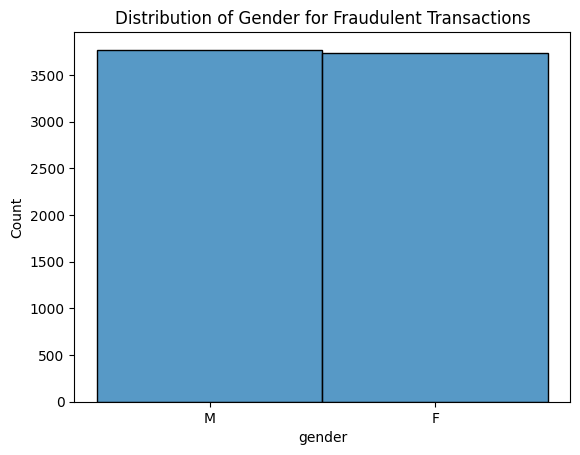

In [21]:
sns.histplot(data=fradulent, x='gender')
plt.title('Distribution of Gender for Fraudulent Transactions')
plt.show()

Findings

1.  No significant evidence to suggest any particular gender is targeted.

In [22]:
df['job'].value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Veterinary surgeon               8
Information officer              8
Contracting civil engineer       7
Ship broker                      7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

#### Do fraudulent transactions overwhelmingly occur in specific spending categories?

Text(0.5, 0, 'Number of Fraudulent Transactions')

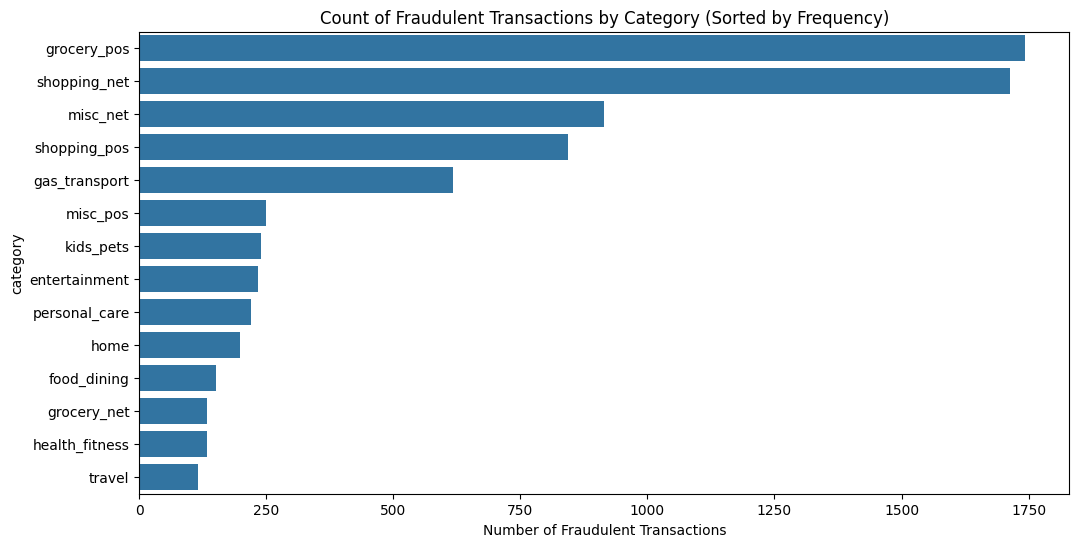

In [23]:

plt.figure(figsize=(12,6))
sns.countplot(data=df[df['is_fraud'] == 1]['category'],order=df[df['is_fraud'] == 1]['category'].value_counts().index)
plt.title('Count of Fraudulent Transactions by Category (Sorted by Frequency)')
plt.xlabel('Number of Fraudulent Transactions')

#### Could fraud attacks target certain regions?

In [24]:
#Plot of Merchant location | check Folder: outputs -> map
import pandas as pd
import geopandas as gpd
import folium
from folium import plugins
from pathlib import Path

project_root = Path.cwd().parent
data_path = project_root / 'data' / 'raw' / 'fraudTrain.csv'
df = pd.read_csv(data_path)

fraud_df = df[df['is_fraud'] == 1].copy()

merchant_geom = gpd.points_from_xy(fraud_df.merch_long,fraud_df.merch_lat)


geo_fraud_df = gpd.GeoDataFrame(
    fraud_df, 
    geometry=merchant_geom
    )


fraud_heatmap = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles="Cartodb dark_matter")

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_fraud_df.geometry]

plugins.HeatMap(heat_data).add_to(fraud_heatmap)



output_dir = project_root / "outputs" / "maps"
output_dir.mkdir(parents=True, exist_ok=True)
output_filepath = output_dir / "fraud_heatmap_merchant_location.html"
fraud_heatmap.save(output_filepath)

print(f"Map successfully saved to: {output_filepath}")

Map successfully saved to: /home/on3b3ar/projects/fraud-detection-mlops-pipeline/outputs/maps/fraud_heatmap_merchant_location.html


In [25]:
#Plot of Cardholder location | check Folder: outputs -> map
cardholder_geom = gpd.points_from_xy(fraud_df.long,fraud_df.lat)

geo_fraud_df_cardholder = gpd.GeoDataFrame(
    fraud_df, 
    geometry=cardholder_geom
    )

fraud_heatmap_cardholder = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles="Cartodb dark_matter")

heat_data_cardholder = [[point.xy[1][0], point.xy[0][0]] for point in geo_fraud_df_cardholder.geometry]

plugins.HeatMap(heat_data_cardholder).add_to(fraud_heatmap_cardholder)

output_dir = project_root / "outputs" / "maps"
output_dir.mkdir(parents=True, exist_ok=True)
output_filepath = output_dir / "fraud_heatmap_cardholder_location.html"
fraud_heatmap_cardholder.save(output_filepath)

print(f"Map successfully saved to: {output_filepath}")

Map successfully saved to: /home/on3b3ar/projects/fraud-detection-mlops-pipeline/outputs/maps/fraud_heatmap_cardholder_location.html


In [26]:
geo_fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,geometry
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.99,-81.73,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.43,-81.18,1,POINT (-81.17948 36.43012)
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.44,-98.46,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.82,-99.14,1,POINT (-99.14279 29.81936)
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.44,-98.46,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.27,-98.84,1,POINT (-98.83636 29.27308)
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.99,-81.73,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.91,-82.09,1,POINT (-82.09101 35.90929)
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.44,-98.46,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.79,-98.68,1,POINT (-98.68341 29.78643)


In [27]:
geo_fraud_df_cardholder['distance_deg']= geo_fraud_df_cardholder.geometry.distance(geo_fraud_df.geometry)
geo_fraud_df_cardholder['distance_km'] = geo_fraud_df_cardholder['distance_deg'] *111

print(f'On average how far away from cardholers do fraud transaction occur?')

print(geo_fraud_df_cardholder['distance_km'].describe())

On average how far away from cardholers do fraud transaction occur?
count   7506.00
mean      85.17
std       31.27
min        0.74
25%       62.96
50%       88.46
75%      108.38
max      155.48
Name: distance_km, dtype: float64


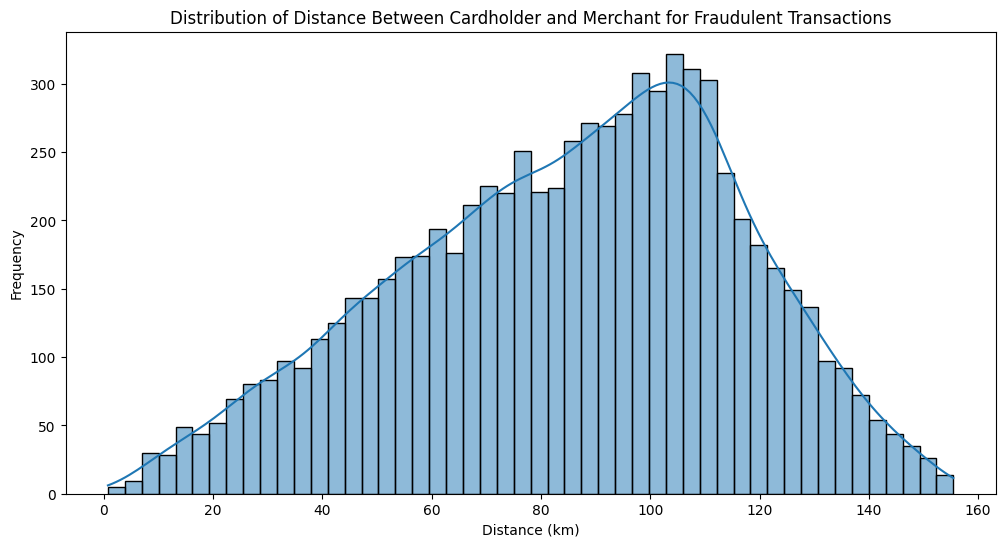

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(data=geo_fraud_df_cardholder, x='distance_km', bins=50, kde=True)
plt.title('Distribution of Distance Between Cardholder and Merchant for Fraudulent Transactions')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

In [29]:
geo_fraud_df_cardholder['city'].value_counts()

city
Houston           39
Warren            33
Naples            29
Huntsville        29
Tulsa             27
                  ..
Bethel             3
Kilgore            2
Phenix City        2
Phoenix            2
Denham Springs     2
Name: count, Length: 702, dtype: int64

Findings:
1.  Fraud attacks target cardholders who appear to be located in central-east to eastern states of the United States
2.  The transactions are more densely cluster in central to eastern United States , with dense clusters on the western borders from Mexico border with Texas up to the border of Vancouver and Washington
3.  The data also suggests that fraud transactions are typical 100-110 km from the cardholders location.

### Do Fraud attacks target regions based on most vulnerable to scams versus most affluent?

In [30]:
print("Top 13 States by Fraud Count")
state_fraud_counts = df.groupby('state')['is_fraud'].sum().sort_values(ascending=False)
print(state_fraud_counts.head(13))

print(f"\nTop 13 Cities by Fraud Count")
city_fraud_counts=df.groupby(['city','city_pop'])['is_fraud'].sum().sort_values(ascending=False)
print(city_fraud_counts.head(13))

Top 13 States by Fraud Count
state
NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
VA    198
SC    193
MO    191
Name: is_fraud, dtype: int64

Top 13 Cities by Fraud Count
city          city_pop
Houston       2906700     39
Huntsville    190178      29
Naples        276002      29
Tulsa         413574      27
Dallas        1263321     27
Topeka        163415      27
Detroit       673342      26
San Antonio   1595797     25
Beaver Falls  28425       24
Clearwater    172247      24
Albuquerque   641349      24
Aurora        389246      23
Warren        134056      23
Name: is_fraud, dtype: int64


/tmp/ipykernel_4195/2399637577.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


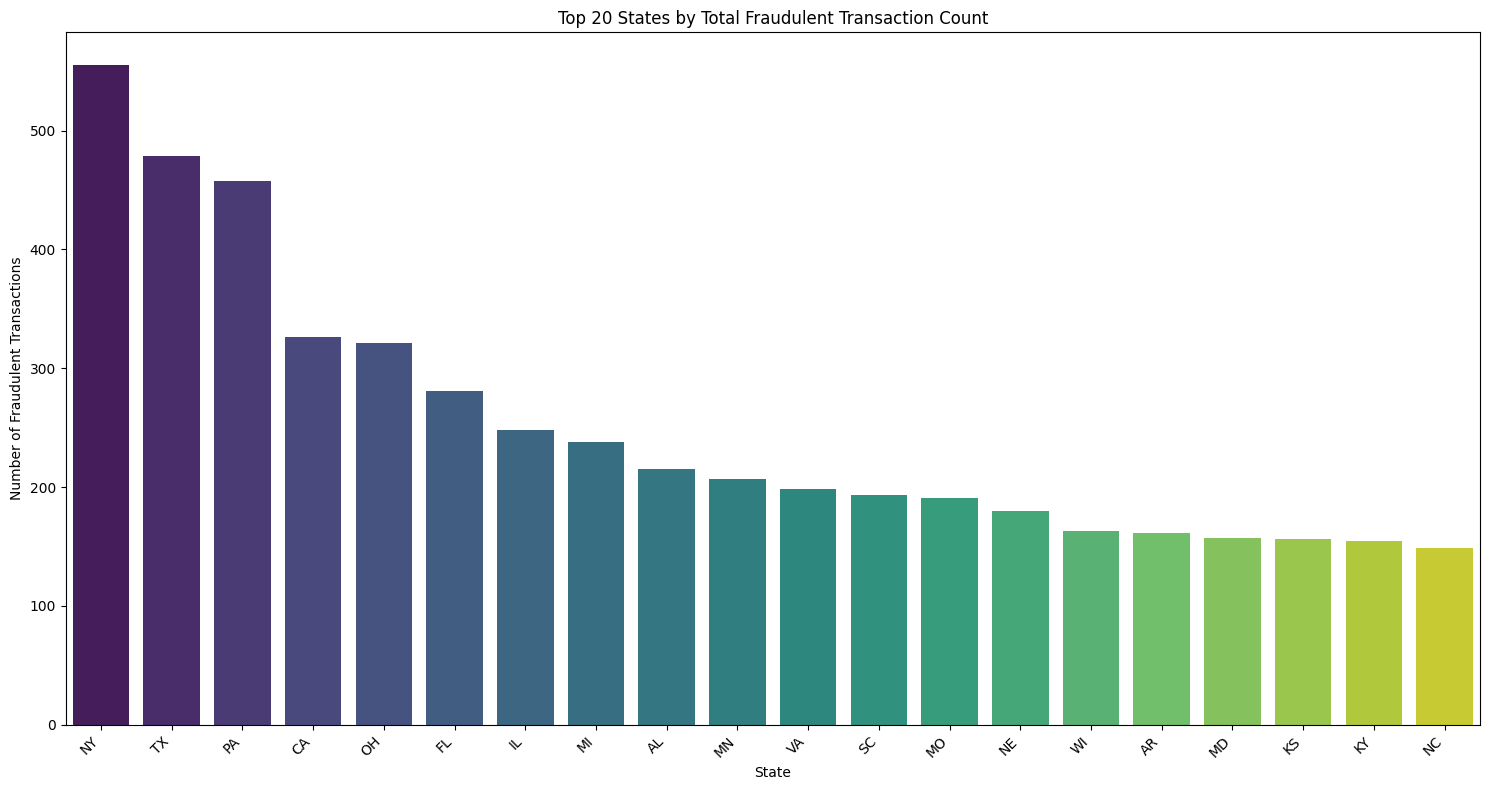

In [35]:
top_states = state_fraud_counts.nlargest(20)
plt.figure(figsize=(15, 8))

sns.barplot(
    x=top_states.index, 
    y=top_states.values, 
    palette='viridis',
    #hue=top_states.index,
    legend=False,
    order=top_states.index # Ensure bars are sorted from highest to lowest
)

plt.title('Top 20 States by Total Fraudulent Transaction Count')
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

In [32]:
state_job_fraud=df.groupby(['state','job'])['is_fraud'].sum().nlargest(30)
state_job_fraud

state  job                                     
TN     Prison officer                              25
TX     Scientist, biomedical                       23
FL     Environmental consultant                    22
NY     Travel agency manager                       22
PA     Public affairs consultant                   21
CA     Wellsite geologist                          20
MO     Land/geomatics surveyor                     20
TX     Editor, film/video                          20
WI     Risk analyst                                20
MN     Freight forwarder                           19
NE     Set designer                                19
FL     Paramedic                                   18
KY     Conservation officer, historic buildings    18
OH     Copywriter, advertising                     17
AR     Engineer, control and instrumentation       16
FL     Geneticist, molecular                       16
GA     Teacher, special educational needs          16
IA     Chief Technology Officer   

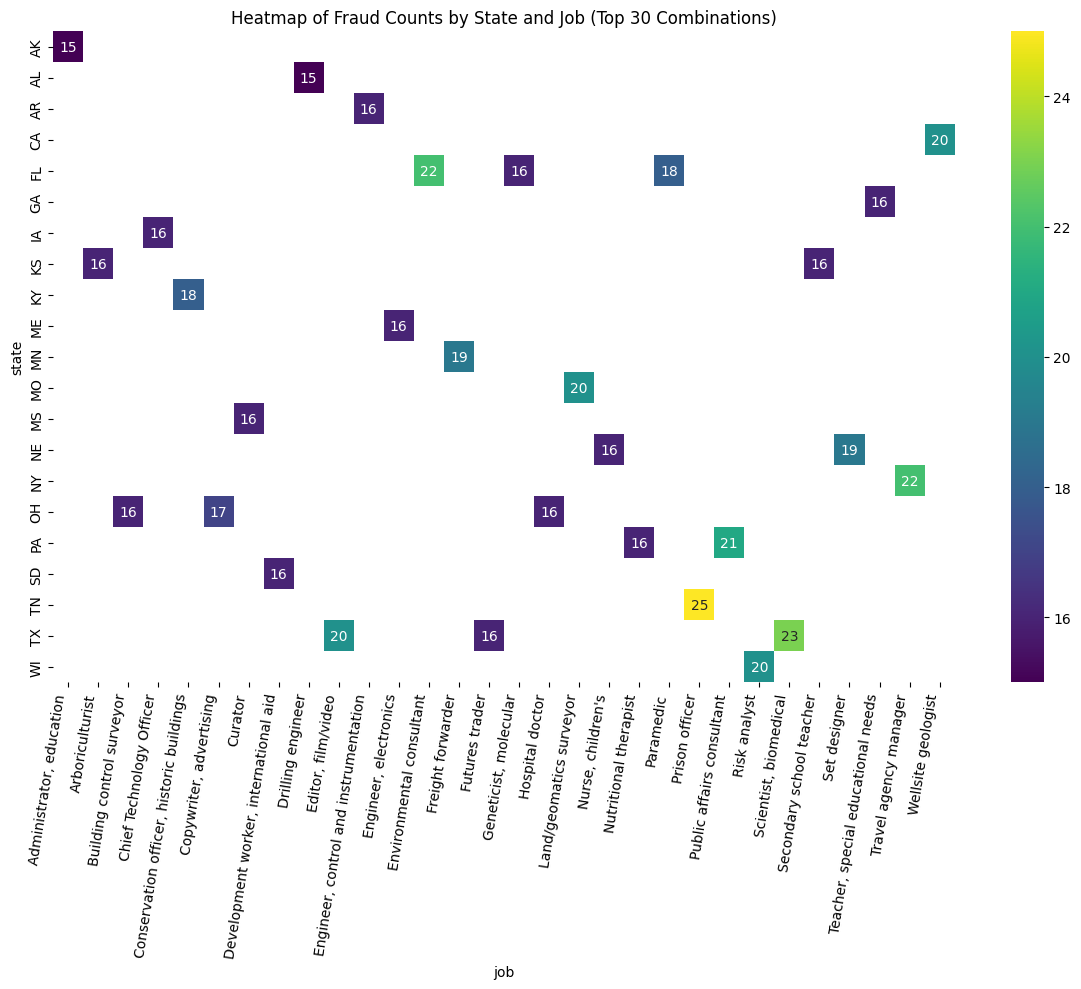

In [33]:
state_job_fraud_df = state_job_fraud.reset_index()
heatmap_data= state_job_fraud_df.pivot(index='state', columns='job', values='is_fraud')

plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True,)
plt.title('Heatmap of Fraud Counts by State and Job (Top 30 Combinations)')
plt.xticks(rotation=81, ha='right')
plt.tight_layout()
plt.show()